# 사이킷런으로 시작하는 머신러닝

### Iris 품종 분류
- sklearn 라이브러리 소개
-- datasets, model_selection, tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

print('iris target values:', iris_label)
print('iris target names:', iris.target_names)

iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df['label'] = iris_label
iris_df.head(3)

iris target values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


학습용, 테스트용 데이터 분할

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state=11)

학습 및 평가

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy: {0:.4f}'.format(accuracy_score(Y_test, pred)))

accuracy: 0.9333


사이킷런은 많은 유형의 Classifier, Regressor 클래스 제공 -> Estimator

- fetch_covtype : 회귀 분석용 토지조사 자료
- fetch_20newsgroups : 뉴스그룹 텍스트 자료
- fetch_olivetti_faces : 얼굴 이미지 자료
- fetch_lfw_people : 얼굴 이미지 자료
- fetch_lfw_paris : 얼굴 이미지
- fetch_rcv : 로이터 뉴스
- fetch_mldata : ML 웹사이트에서 다운로드

- make_classification : 분류를 위한 데이터셋
- make_blobs : 클러스터링을 위한 데이터셋

In [ ]:
from sklearn.datasets import fetch_rcv1

In [ ]:
# data
# target
# target_names
# feature_names
# DESCR
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Model Selection 소개

train_test_split
- test_size, train_size
- shuffle
- random_state

### 교차검증
- K Fold
- Stratified K Fold

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
iris = load_iris()
features = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
print('dataset size: ', features.shape[0])

dataset size:  150


In [ ]:
n_iter = 0
for train_index, test_index in kfold.split(features):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  accuracy = np.round(accuracy_score(y_test, pred),4)
  cv_accuracy.append(accuracy)
print('mean valid accuracy: ', np.mean(cv_accuracy))

mean valid accuracy:  0.9


In [ ]:
# Stratified K Fold : 불균형한 분포를 가진 데이터에 적용할 수 있는 K Fold

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

KFold의 문제: 분포도를 반영하지 못함

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_idx, test_idx in kfold.split(iris_data):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_idx]
  label_test = iris_df['label'].iloc[test_idx]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('테스트 레이블 데이터 분포:\n', label_test.value_counts())
  

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
테스트 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
테스트 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
테스트 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=3)
n_iter = 0
for train_idx, test_idx in skf.split(iris_df, iris_df['label']): # label 도 넣어줘야 함
  n_iter +=1
  label_train = iris_df['label'].iloc[train_idx]
  label_test = iris_df['label'].iloc[test_idx]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('테스트 레이블 데이터 분포:\n', label_test.value_counts())
  


## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
테스트 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
테스트 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
테스트 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
# StratifiedKFold
iris = load_iris()
features = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156)

skfold  = StratifiedKFold(n_splits=3)
cv_accuracy = []
n_iter = 0

for train_index, test_index in skfold.split(features, label):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  accuracy = np.round(accuracy_score(y_test, pred),4)
  cv_accuracy.append(accuracy)
print('mean valid accuracy: ', np.mean(cv_accuracy))

mean valid accuracy:  0.9666666666666667


In [ ]:
# 교차 검증을 간편하게 
# cross_val_score : kfold 과정을 한 번에 수행
# cross_validate: 여러 개의 평가지표, 수행시간 반환가능

In [ ]:
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state=156)
scores = cross_val_score(dt_clf,X=features, y=label, cv=3, scoring='accuracy')
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도 0.9667


### GridSearchCV 하이퍼파라미터 튜닝과 교차검증 수행

In [ ]:
grid_parameters = {
    'max_depth':[1,2,3],
    'min_samples_split':[2,3]
}
# 학습/평가 횟수: 3*2*cv
# estimator, param_grid, scoring, cv, refit

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtree = DecisionTreeClassifier(random_state=156)
grid_dtree = GridSearchCV(dtree, param_grid=grid_parameters, cv=3, refit=True) 
# refit = True 이면 최적의 하이퍼파라미터를 찾은 뒤 estimator를 해당 하이퍼파라미터로 재학습
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [ ]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003085,0.002016,0.000520,0.000044,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.676471,0.666667,0.666667,0.669935,0.004622,5
1,0.000865,0.000051,0.000298,0.000015,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.676471,0.666667,0.666667,0.669935,0.004622,5
2,0.000754,0.000016,0.000269,0.000004,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.970588,0.939394,0.878788,0.929590,0.038113,3
3,0.000723,0.000007,0.000261,0.000009,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.970588,0.939394,0.878788,0.929590,0.038113,3
4,0.000719,0.000014,0.000260,0.000010,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.970588,0.939394,0.969697,0.959893,0.014500,1
5,0.000753,0.000015,0.000258,0.000002,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.970588,0.939394,0.969697,0.959893,0.014500,1


In [ ]:
pred = grid_dtree.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

1.0

In [ ]:
grid_dtree.best_score_, grid_dtree.best_params_

(0.9598930481283423, {'max_depth': 3, 'min_samples_split': 2})

In [ ]:
grid_dtree.predict(X_test), y_test


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]))

### 인코딩

레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [ ]:
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = OneHotEncoder()
items = np.array(items).reshape(-1,1)
encoder.fit(items)

oh_labels = encoder.transform(items)

In [ ]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
df = pd.DataFrame(items)
df

,0
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [ ]:
pd.get_dummies(df)

,0_TV,0_냉장고,0_믹서,0_선풍기,0_전자렌지,0_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 스케일링

- StandardScalar: RBF 커널 SVM, Linear Regression, Logistic Regression 데이터의 가우시안 분포 가정
- MinMaxScalar: 데이터의 분포가 가우시안 분포가 아닐때

In [32]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
iris = load_iris()
iris_data =iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.min())
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 타이타닉 생존자 예측

In [16]:
import pandas as pd
import seaborn as sns 
titanic_df = pd.read_csv('./titanic.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# NULL 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [25]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
titanic_df.dtypes[titanic_df.dtypes=='object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [26]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [28]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [29]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [30]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

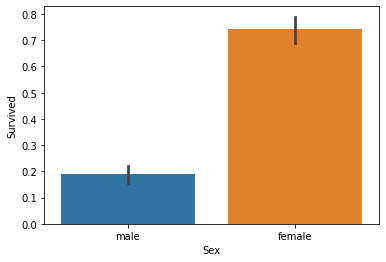

In [33]:
sns.barplot(x='Sex',y='Survived', data=titanic_df)

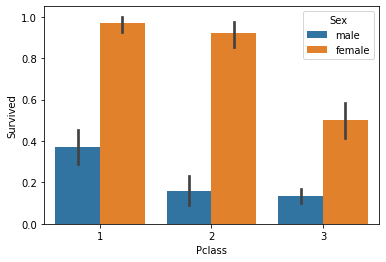

In [34]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

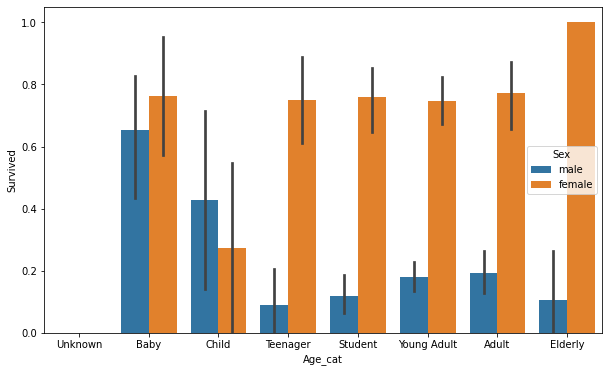

In [36]:
import matplotlib.pyplot as plt

def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'
  
  return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby','Child','Teenager', 'Student', 'Young Adult','Adult','Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
  df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  features = ['Cabin','Sex','Embarked']
  le = LabelEncoder()
  for feature in features:
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

titanic_df = pd.read_csv('./titanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1, inplace=False)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,146,3
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,146,3
3,1,0,35.000000,1,0,53.1000,55,3
4,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,146,3
887,1,0,19.000000,0,0,30.0000,30,3
888,3,0,29.699118,1,2,23.4500,146,3
889,1,1,26.000000,0,0,30.0000,60,0


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.2)

In [44]:
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.metrics import *

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.7988826815642458
0.8212290502793296
0.7988826815642458


In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import *
import numpy as np

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores = []

  for i, (train_idx, test_idx) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_idx], X_titanic_df.values[test_idx]
    y_train, y_test =  y_titanic_df.values[train_idx], y_titanic_df.values[test_idx]

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    scores.append(acc)
    print(i, acc)
  mean_score = np.mean(scores)
  print('mean: {0:4f}'.format(mean_score))
exec_kfold(dt_clf, folds=5)

0 0.7541899441340782
1 0.7584269662921348
2 0.8146067415730337
3 0.7752808988764045
4 0.7808988764044944
mean: 0.776681


In [50]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores, 'mean:',np.mean(scores))

[0.73743017 0.74719101 0.8258427  0.76404494 0.80337079] mean: 0.7755759211600026


In [57]:
parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=3, refit=True)
grid_dclf.fit(X_train, y_train)
best_clf = grid_dclf.best_estimator_
print('best', grid_dclf.best_params_)
print('score', grid_dclf.best_score_)

dpred = best_clf.predict(X_test)
acc = accuracy_score(y_test, dpred)
print('acc:{0:.4f}'.format(acc))

best {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
score 0.8271874150504083
acc:0.8101
